# Decision Tree

### Importing libraries

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

### Importing and preprocessing of the dataset

In [131]:
data = pd.read_csv("Social_Network_Ads.csv")
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [132]:
print(X)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [133]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


### Spliting dataset into training and test set

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [135]:
print(X_train)

[[    60  46000]
 [    52  21000]
 [    26  15000]
 [    38  80000]
 [    20  82000]
 [    40  78000]
 [    42 108000]
 [    54 104000]
 [    32 150000]
 [    33  51000]
 [    56 104000]
 [    19  70000]
 [    36 118000]
 [    42  64000]
 [    27  89000]
 [    37 137000]
 [    50  44000]
 [    22  27000]
 [    20  82000]
 [    18  52000]
 [    49  28000]
 [    24  32000]
 [    47 113000]
 [    38  61000]
 [    37  78000]
 [    27  88000]
 [    47  30000]
 [    28  85000]
 [    44  39000]
 [    40  57000]
 [    37  80000]
 [    28  79000]
 [    26 118000]
 [    31  76000]
 [    48 119000]
 [    23  66000]
 [    41  71000]
 [    58  95000]
 [    29  83000]
 [    45  22000]
 [    30  87000]
 [    48  90000]
 [    36  54000]
 [    27  84000]
 [    28  37000]
 [    38  50000]
 [    31  89000]
 [    35  23000]
 [    36  99000]
 [    24  58000]
 [    25  22000]
 [    32  86000]
 [    41  52000]
 [    36  33000]
 [    33  69000]
 [    59  42000]
 [    33  41000]
 [    24  89000]
 [    41  5200

In [136]:
print(X_test)

[[    48  33000]
 [    26  81000]
 [    32  18000]
 [    31  18000]
 [    26  15000]
 [    26  30000]
 [    46  22000]
 [    35 108000]
 [    39  77000]
 [    60  83000]
 [    57 122000]
 [    36 144000]
 [    46  59000]
 [    47 144000]
 [    29  43000]
 [    42  53000]
 [    35  25000]
 [    35  53000]
 [    40  57000]
 [    37  57000]
 [    48  35000]
 [    37  77000]
 [    35  27000]
 [    42  65000]
 [    40  47000]
 [    24  55000]
 [    38  71000]
 [    57  60000]
 [    19  19000]
 [    32 117000]
 [    42  80000]
 [    19  26000]
 [    35  71000]
 [    39  96000]
 [    39  73000]
 [    20  74000]
 [    27  31000]
 [    52  38000]
 [    29  75000]
 [    39 106000]
 [    55  39000]
 [    42 104000]
 [    56  60000]
 [    25  90000]
 [    28  87000]
 [    30  49000]
 [    59  29000]
 [    24  27000]
 [    37  93000]
 [    42  90000]
 [    32 120000]
 [    38  59000]
 [    21  68000]
 [    45  79000]
 [    33 113000]
 [    59  83000]
 [    35  97000]
 [    42  70000]
 [    28  5900

In [137]:
print(y_train)

[1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0
 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0
 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1
 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0
 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [138]:
print(y_test)

[1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1
 0 1 0 0 0 0]


### Feature Scaling

In [139]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [140]:
print(X_train)

[[ 2.10772327 -0.68732175]
 [ 1.35475487 -1.42627808]
 [-1.09239244 -1.6036276 ]
 [ 0.03706016  0.31765885]
 [-1.65711874  0.37677536]
 [ 0.22530226  0.25854234]
 [ 0.41354437  1.14528994]
 [ 1.54299697  1.02705693]
 [-0.52766614  2.38673657]
 [-0.43354509 -0.53953049]
 [ 1.73123907  1.02705693]
 [-1.7512398   0.02207632]
 [-0.15118194  1.44087247]
 [ 0.41354437 -0.1552732 ]
 [-0.99827139  0.58368313]
 [-0.05706089  2.00247928]
 [ 1.16651277 -0.74643826]
 [-1.46887664 -1.24892856]
 [-1.65711874  0.37677536]
 [-1.84536085 -0.50997224]
 [ 1.07239172 -1.21937031]
 [-1.28063454 -1.1011373 ]
 [ 0.88414962  1.2930812 ]
 [ 0.03706016 -0.24394796]
 [-0.05706089  0.25854234]
 [-0.99827139  0.55412488]
 [ 0.88414962 -1.1602538 ]
 [-0.90415034  0.46545012]
 [ 0.60178647 -0.89422953]
 [ 0.22530226 -0.36218097]
 [-0.05706089  0.31765885]
 [-0.90415034  0.2881006 ]
 [-1.09239244  1.44087247]
 [-0.62178719  0.19942584]
 [ 0.97827067  1.47043072]
 [-1.37475559 -0.09615669]
 [ 0.31942331  0.05163457]
 

In [141]:
print(X_test)

[[ 0.97827067 -1.07157904]
 [-1.09239244  0.3472171 ]
 [-0.52766614 -1.51495284]
 [-0.62178719 -1.51495284]
 [-1.09239244 -1.6036276 ]
 [-1.09239244 -1.1602538 ]
 [ 0.79002857 -1.39671983]
 [-0.24530299  1.14528994]
 [ 0.13118121  0.22898409]
 [ 2.10772327  0.40633361]
 [ 1.82536012  1.55910548]
 [-0.15118194  2.20938705]
 [ 0.79002857 -0.30306446]
 [ 0.88414962  2.20938705]
 [-0.81002929 -0.77599651]
 [ 0.41354437 -0.48041398]
 [-0.24530299 -1.30804507]
 [-0.24530299 -0.48041398]
 [ 0.22530226 -0.36218097]
 [-0.05706089 -0.36218097]
 [ 0.97827067 -1.01246254]
 [-0.05706089  0.22898409]
 [-0.24530299 -1.24892856]
 [ 0.41354437 -0.12571495]
 [ 0.22530226 -0.6577635 ]
 [-1.28063454 -0.42129748]
 [ 0.03706016  0.05163457]
 [ 1.82536012 -0.27350621]
 [-1.7512398  -1.48539459]
 [-0.52766614  1.41131422]
 [ 0.41354437  0.31765885]
 [-1.7512398  -1.27848682]
 [-0.24530299  0.05163457]
 [ 0.13118121  0.7905909 ]
 [ 0.13118121  0.11075108]
 [-1.65711874  0.14030933]
 [-0.99827139 -1.13069555]
 

### Trianing the Decision tree model on the training set

In [142]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting a new result

In [143]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


### Predicting the test results

In [144]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [145]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[43 11]
 [ 3 23]]


0.825

### Visualising the training set result

/var/folders/9f/3bvh2cpx00q65vmntbjg24v00000gn/T/ipykernel_20974/2272292140.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)


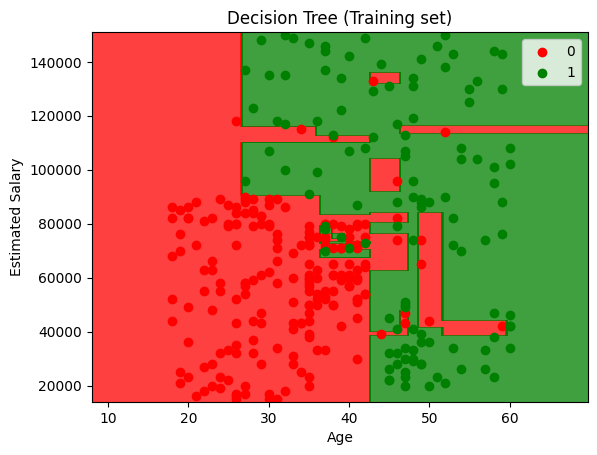

In [146]:
X_set,y_set = sc.inverse_transform(X_train),y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10,stop = X_set[:,0].max() + 10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000,stop = X_set[:,1].max() + 1000,step = 0.25))
plt.contourf(X1,X2,classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_test)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the test set result

/var/folders/9f/3bvh2cpx00q65vmntbjg24v00000gn/T/ipykernel_20974/1376315560.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)


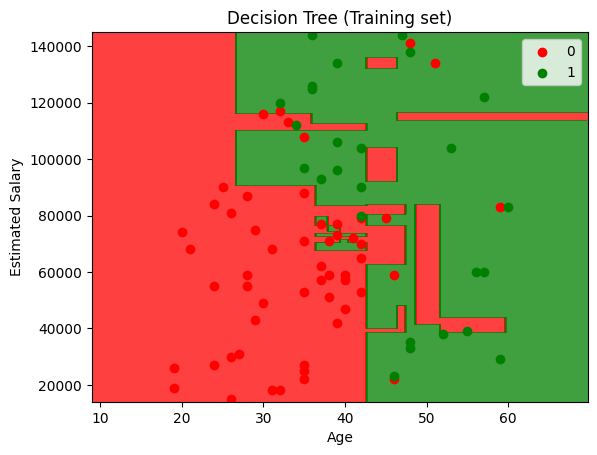

In [147]:
X_set,y_set = sc.inverse_transform(X_test),y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10,stop = X_set[:,0].max() + 10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000,stop = X_set[:,1].max() + 1000,step = 0.25))
plt.contourf(X1,X2,classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_test)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()